<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Data Science and AI
## Lab 7.1.1: Decision Trees

INSTRUCTIONS:

- Read the guides and hints, then create the necessary analysis and code for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.6895
    - **ROC AUC**  = 0.5690
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first step is to idenfy the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ then **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, labour and iteractive processes. It is part of the process to repeat, review and change when finding a dead-end.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.
Is this guy going to donate blood in march 2007 or not
## Actual Question
Choose the **one** question that should be answered.
Is this guy going to donate blood in march 2007 or not

# Step 2: Find the Data
### Blood Transfusion Service Center DataSet
- **Abstract**: Data taken from the **Blood Transfusion Service Center** in Hsin-Chu City in Taiwan.
- Date Donated: 2008-10-03
- Source:
        Original Owner and Donor: Prof. I-Cheng Yeh
        Department of Information Management
        Chung-Hua University,
        Hsin Chu, Taiwan 30067, R.O.C.

- Citation Request:
    **NOTE**: Reuse of this database is unlimited with retention of copyright notice for Prof. I-Cheng Yeh and the following published paper:

        Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](https://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [88]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import datasets
import seaborn as sns

In [89]:
df = pd.read_csv('../../Data/transfusion.csv')

df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or spurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [90]:
df.shape

(748, 5)

In [91]:
df.dtypes

Recency (months)                              int64
Frequency (times)                             int64
Monetary (c.c. blood)                         int64
Time (months)                                 int64
whether he/she donated blood in March 2007    int64
dtype: object

In [92]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency (months),748.0,9.506684,8.095396,0.0,2.75,7.0,14.0,74.0
Frequency (times),748.0,5.514706,5.839307,1.0,2.00,4.0,7.0,50.0
Monetary (c.c. blood),748.0,1378.676471,1459.826781,250.0,500.00,1000.0,1750.0,12500.0
Time (months),748.0,34.282086,24.376714,2.0,16.00,28.0,50.0,98.0
whether he/she donated blood in March 2007,748.0,0.237968,0.426124,0.0,0.00,0.0,0.0,1.0


In [93]:
df['whether he/she donated blood in March 2007'].value_counts()

whether he/she donated blood in March 2007
0    570
1    178
Name: count, dtype: int64

No obvious outliers that need to be looked at, but will confirm with a boxplot further down.

Considering all data types are int rather than strings, I can assume there are no codes to represent absences of data. Likewise, the data ranges suggest there are no weird numbers representing coded content either.

In [94]:
df.isnull().sum()

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

In [95]:
df.isna().sum()

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

In [109]:
df.duplicated().sum()

215

In [110]:
duplicate_rows = df.loc[df.duplicated(keep=False), :]
print(duplicate_rows)


     Recency (months)  Frequency (times)  Monetary (c.c. blood)  \
14                  2                  6                   1500   
18                  2                  6                   1500   
19                  2                  3                    750   
20                  2                  3                    750   
22                  2                  6                   1500   
..                ...                ...                    ...   
735                23                  1                    250   
736                23                  1                    250   
737                23                  1                    250   
738                23                  1                    250   
740                23                  1                    250   

     Time (months)  whether he/she donated blood in March 2007  
14              15                                           1  
18              15                                           1  


Even though there are a high number of duplicate rows, it all looks to me like legitimate data, and therefore it wouldn't be appropriate for me to remove it.

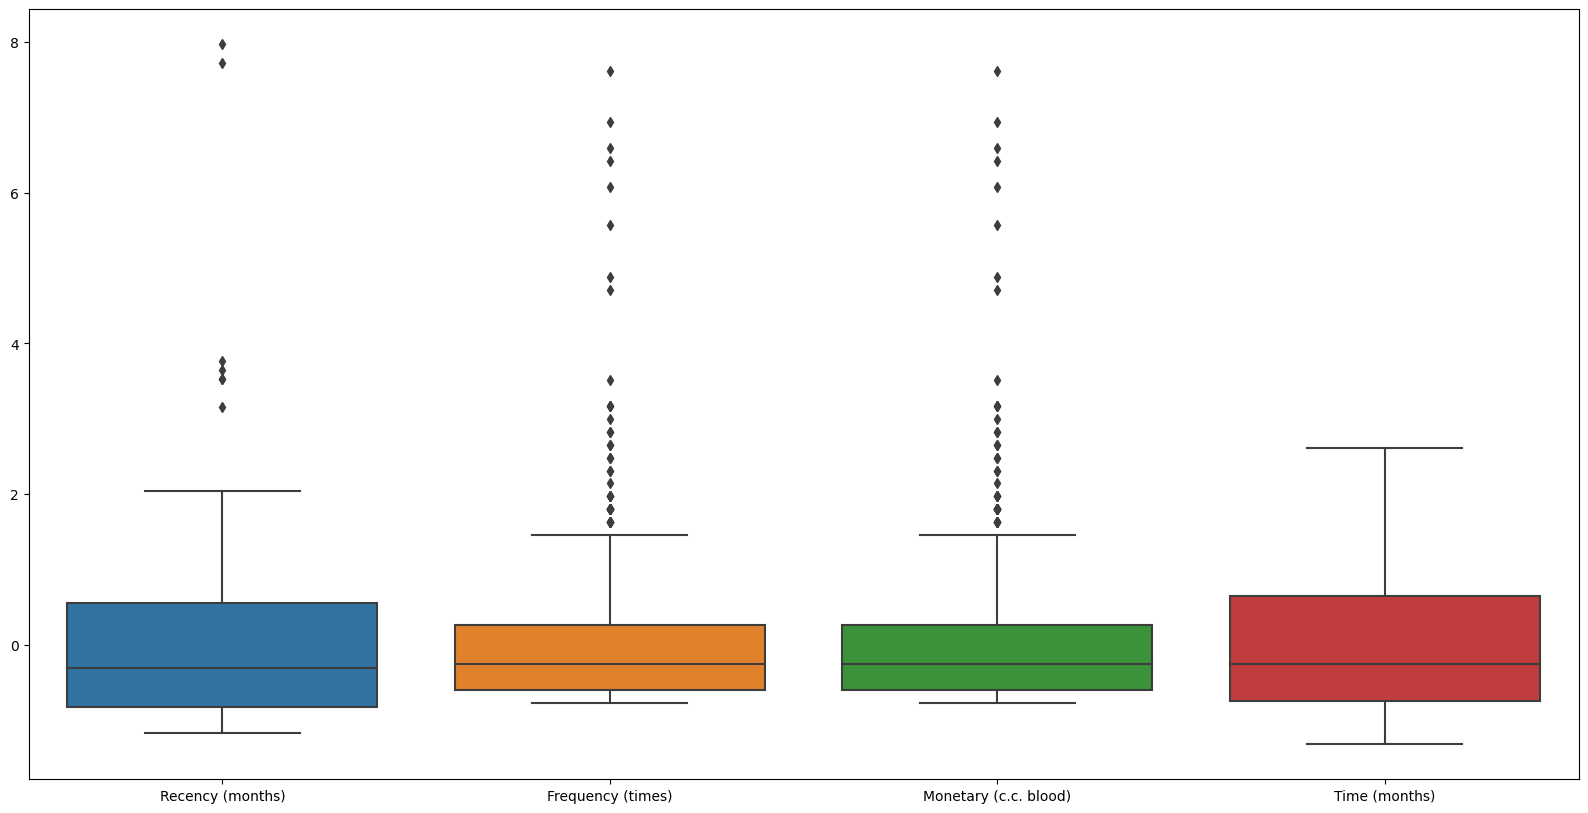

In [96]:
from sklearn.preprocessing import StandardScaler

X = df.drop(['whether he/she donated blood in March 2007'],axis=1)
y = df['whether he/she donated blood in March 2007']

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

plt.figure(figsize=(20, 10))
sns.boxplot(data=X_scaled)
plt.show()

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary) - Not necessary
    - **Null** (remove or interpolate if possible or necessary) - Not necessary
    - **Missing Values** (remove or interpolate if possible or necessary) - Not necessary
    - **Coded content** (transform if possible or necessary [str to number or vice-versa]) - Not necessary
    - **Normalisation** (if possible or necessary) - Done above
    - **Feature Engeneer** (if useful or necessary) - Not necessary

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)? **Recency - months since last donation, Frequency - total number of donation, Monetary - total blood donated in c.c., Time - months since first donation. These are all useful features and will be included in my modelling**
- Is there an output variable (label)? **Yes**
- If there is an output variable:
    - What is it? **'whether he/she donated blood in March 2007' is our target**
    - What is its type? **It is a binary classification (represented with a 0 or 1)**
- What type of Modelling is it?
    - [*] Supervised
    - [ ] Unsupervised
- What type of Modelling is it?
    - [ ] Regression
    - [*] Classification (binary)
    - [ ] Classification (multi-class)
    - [ ] Clustering

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when spliting

In [97]:
y.value_counts()

whether he/she donated blood in March 2007
0    570
1    178
Name: count, dtype: int64

In [98]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Apply SMOTE only on the training data
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [99]:
print(X_train_res.shape)
y_train_res.value_counts()

(798, 4)


whether he/she donated blood in March 2007
0    399
1    399
Name: count, dtype: int64

# Step 8: Define a Model

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [100]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

# Step 9: Fit the Model

In [101]:
clf = clf.fit(X_train_res,y_train_res)

# Step 10: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [102]:
from sklearn import metrics

y_pred = clf.predict(X_train_res)

accuracy = accuracy_score(y_train_res, y_pred)

print('Accuracy = ', accuracy)

Accuracy =  0.9548872180451128


Checking the accuracy using the test data

In [103]:
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print('Accuracy = ', accuracy)

Accuracy =  0.6933333333333334


Looks like not specifying any max depth for the model has resulted in an over-fitted model considering there is such a large difference between the accuracy using the training data versus the test data. I will now use GridSearchCV to attempt to optimise my hyper parameters.

In [104]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

In [114]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 15, 20, 25, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
}

dtc = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(dtc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_res, y_res)

best_clf = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best parameters found: ", best_params)

Best parameters found:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5}


In [115]:
best_clf.fit(X_train_res, y_train_res)

y_pred = best_clf.predict(X_train_res)

accuracy = accuracy_score(y_train_res, y_pred)

print('Accuracy = ', accuracy)

Accuracy =  0.8596491228070176


Accuracy using the training data is lower than previous, but I don't mind as long as the test data performs better

# Step 11: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

Accuracy =  0.7022222222222222


<Axes: xlabel='Predicted', ylabel='Actual'>

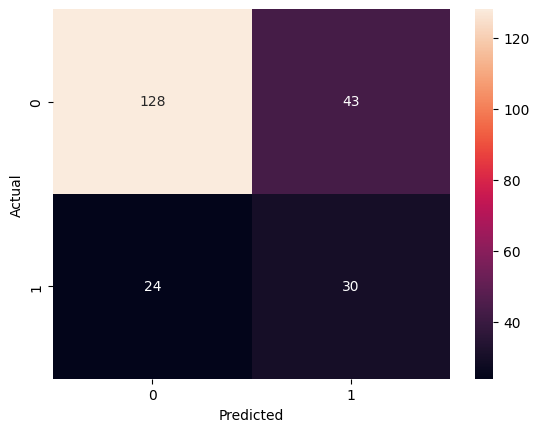

In [116]:
y_pred = best_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print('Accuracy = ', accuracy)

confusion_df = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_df, annot=True,fmt="d")

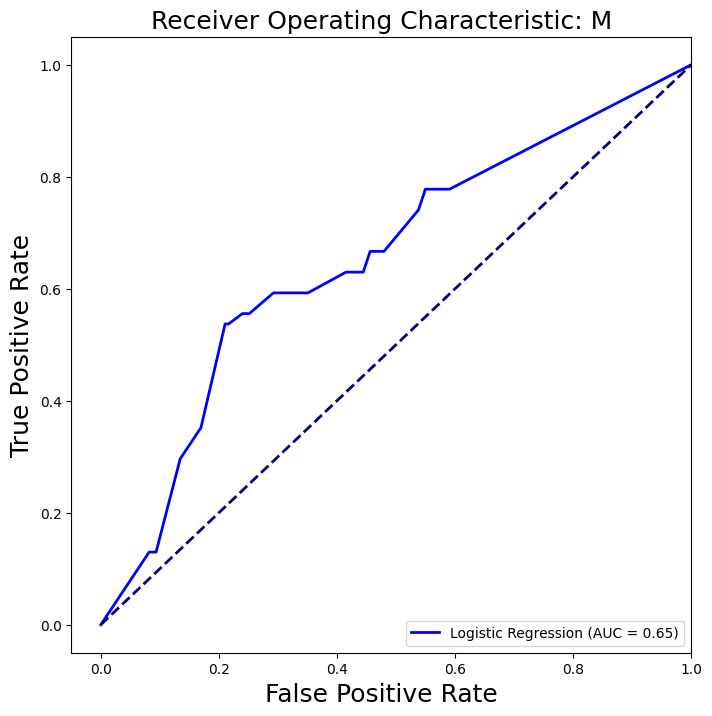

In [108]:
from sklearn.metrics import roc_curve, auc

y_scores = best_clf.predict_proba(X_test)[:, 1]


# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

#plot
plt.figure(figsize=[8,8])

plt.plot(fpr, tpr, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Plot the random guess line

plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver Operating Characteristic: M', fontsize=18)
plt.legend(loc="lower right")
plt.show()

# Step 12: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



